In [14]:
# Imports and setup section
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for clarity

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # set backend if using matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # For environments that only have plt imported

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline

# Set visual style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Print a confirmation message
print('Libraries imported and setup complete.')

Libraries imported and setup complete.


In [15]:
# Data Loading
file_path = '/Users/tejasrielabotharam/Downloads/online_retail_customer_data_extended.csv'

try:
    df = pd.read_csv(file_path, encoding='ascii', delimiter=',')
    print('Data loaded successfully.')
except Exception as e:
    # If you encounter an error reading the file, make sure the file path and encoding are correct
    print('Error loading data:', e)

# Display the first few rows (this will be generated when running the notebook)
df.head()

Data loaded successfully.


,CustomerID,Age,Gender,Annual_Income_USD,Spending_Score,Membership_Status,Preferred_Payment_Method,Region,Total_Purchases,Avg_Purchase_Value,Last_Purchase_Date,Churn,Satisfaction_Score,Website_Visits_Last_Month,Avg_Time_Per_Visit_Minutes,Support_Tickets_Last_6_Months,Referred_Friends
0,2f8c8c58-4779-4006-aa23-81db3a352da3,56,Female,79228,73,Bronze,Cryptocurrency,Central,17,209.07,2025-05-01,0,2.3,7,3.01,0,1
1,4e6558a6-7f45-4f2a-8dfc-fb05210c5a54,69,Female,23205,65,Silver,Cryptocurrency,Central,21,25.60,2025-04-14,0,2.5,14,5.80,5,2
2,11ab8d14-6dd9-4a49-84cc-963431a8e6fc,46,Male,54929,68,Bronze,Debit Card,Central,25,105.48,2024-11-20,0,4.6,18,5.00,0,0
3,503e4ec0-42c7-4c2d-8cda-a480ad492b4b,32,Female,103384,71,Bronze,PayPal,Central,25,381.95,2024-08-22,1,4.9,20,5.98,5,0
4,841426ba-7371-43b1-9cba-036d07d6c85e,60,Male,53411,11,Silver,PayPal,West,24,319.19,2025-02-05,0,1.2,18,1.67,1,1


In [16]:
# Check and convert date columns
if 'Last_Purchase_Date' in df.columns:
    try:
        df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'], errors='coerce')
        print('Converted Last_Purchase_Date to datetime.')
    except Exception as e:
        # This error resolution ensures that the dates are properly formatted
        print('Error converting Last_Purchase_Date:', e)

# Check for missing values in the dataframe
missing_vals = df.isnull().sum()
print('Missing values in each column:')
print(missing_vals)

# For simplicity, we'll fill missing values with appropriate strategies
# Numerical columns with median and categorical columns with mode
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f'Filled missing numeric values in {col} with median: {median_val}')

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f'Filled missing categorical values in {col} with mode: {mode_val}')

# Convert categorical columns to category data type
for col in categorical_cols:
    df[col] = df[col].astype('category')

print('Data cleaning and preprocessing complete.')

Converted Last_Purchase_Date to datetime.
Missing values in each column:
CustomerID                       0
Age                              0
Gender                           0
Annual_Income_USD                0
Spending_Score                   0
Membership_Status                0
Preferred_Payment_Method         0
Region                           0
Total_Purchases                  0
Avg_Purchase_Value               0
Last_Purchase_Date               0
Churn                            0
Satisfaction_Score               0
Website_Visits_Last_Month        0
Avg_Time_Per_Visit_Minutes       0
Support_Tickets_Last_6_Months    0
Referred_Friends                 0
dtype: int64
Data cleaning and preprocessing complete.


                                  CustomerID          Age Gender  \
count                                   9000  9000.000000   9000   
unique                                  9000          NaN      3   
top     000cc965-4b55-45d1-be1c-e9637b7d140e          NaN   Male   
freq                                       1          NaN   4399   
mean                                     NaN    43.550444    NaN   
min                                      NaN    18.000000    NaN   
25%                                      NaN    31.000000    NaN   
50%                                      NaN    43.000000    NaN   
75%                                      NaN    56.000000    NaN   
max                                      NaN    69.000000    NaN   
std                                      NaN    14.909264    NaN   

        Annual_Income_USD  Spending_Score Membership_Status  \
count         9000.000000     9000.000000              9000   
unique                NaN             NaN                

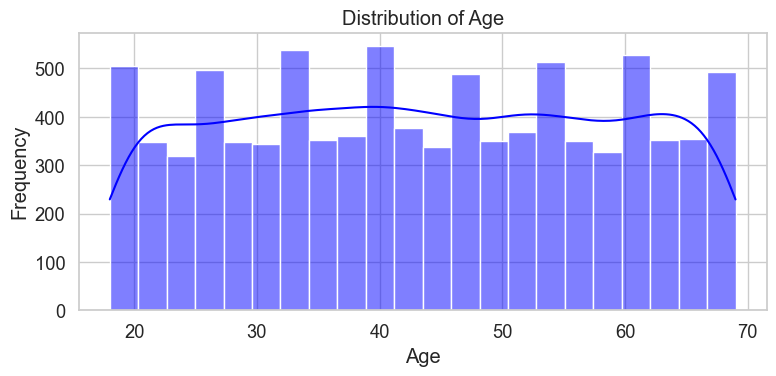

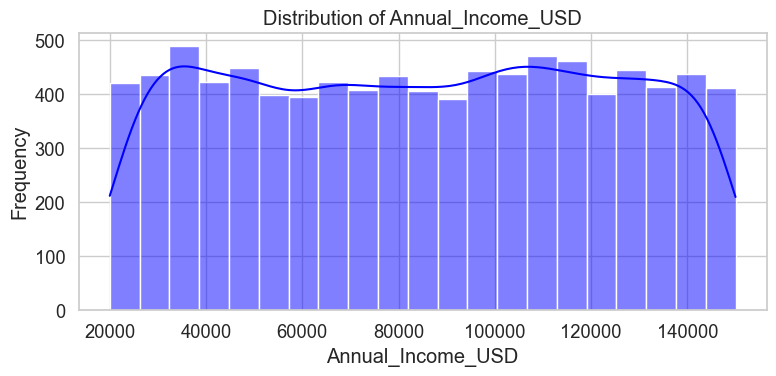

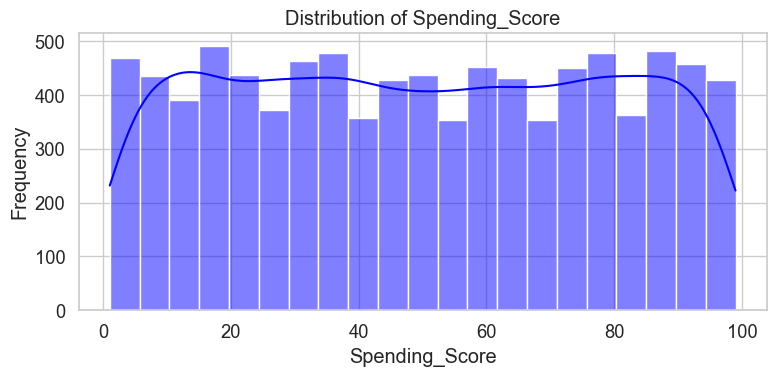

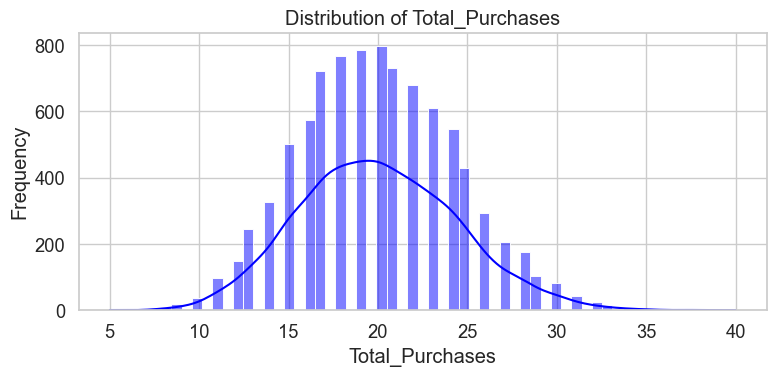

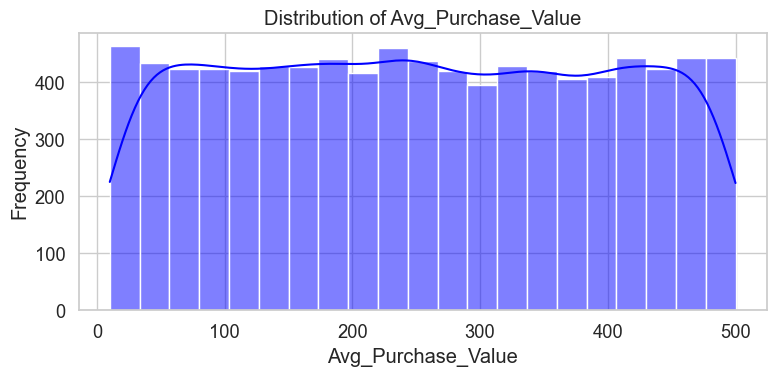

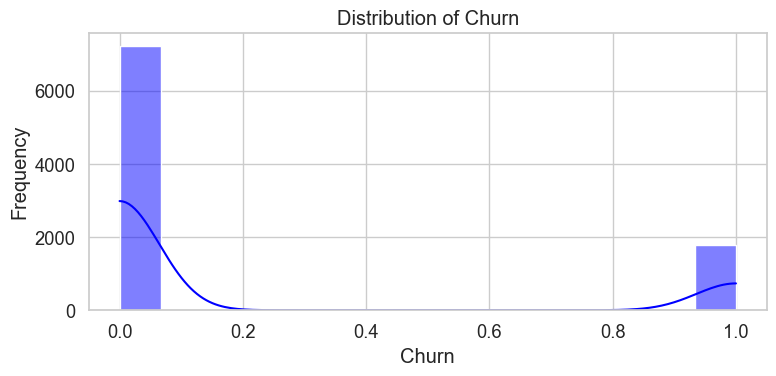

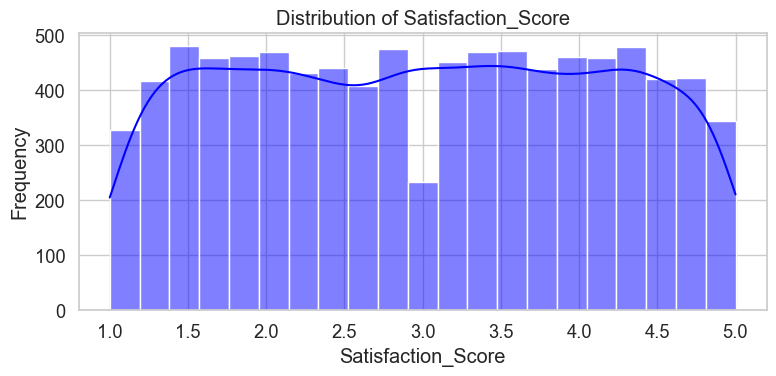

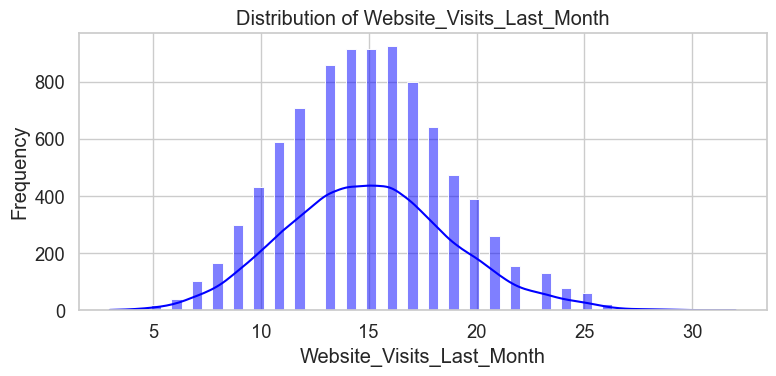

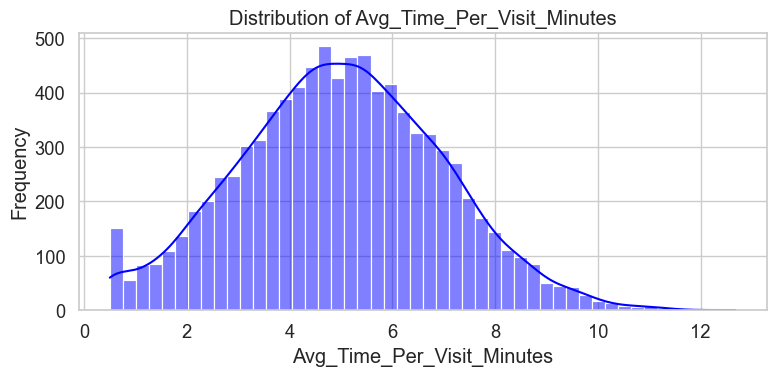

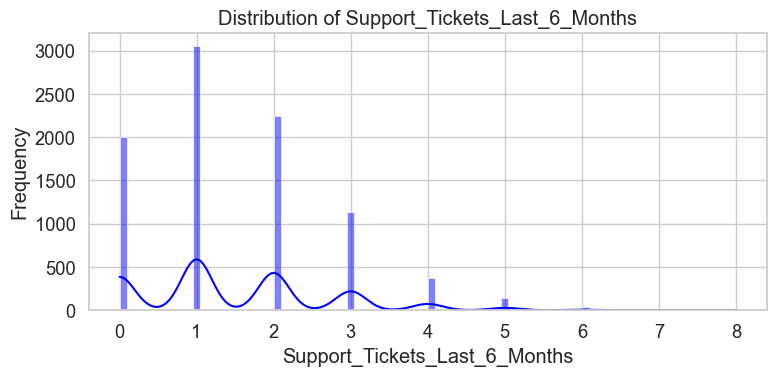

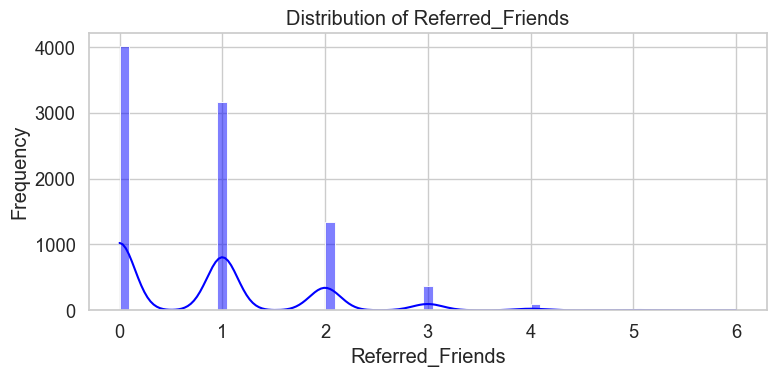

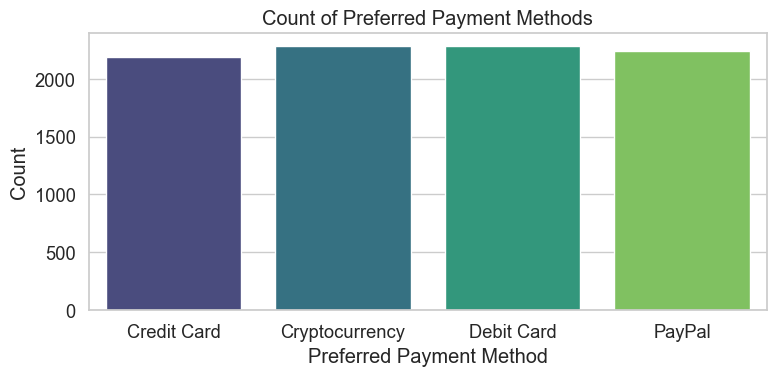

In [17]:
# Basic descriptive statistics and data overview
print(df.describe(include='all'))

# Distribution of numeric variables using histograms
numeric_df = df.select_dtypes(include=[np.number])

for col in numeric_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Count plots for categorical variables (Using Preferred Payment Method as an example)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Preferred_Payment_Method', palette='viridis')
plt.title('Count of Preferred Payment Methods')
plt.xlabel('Preferred Payment Method')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

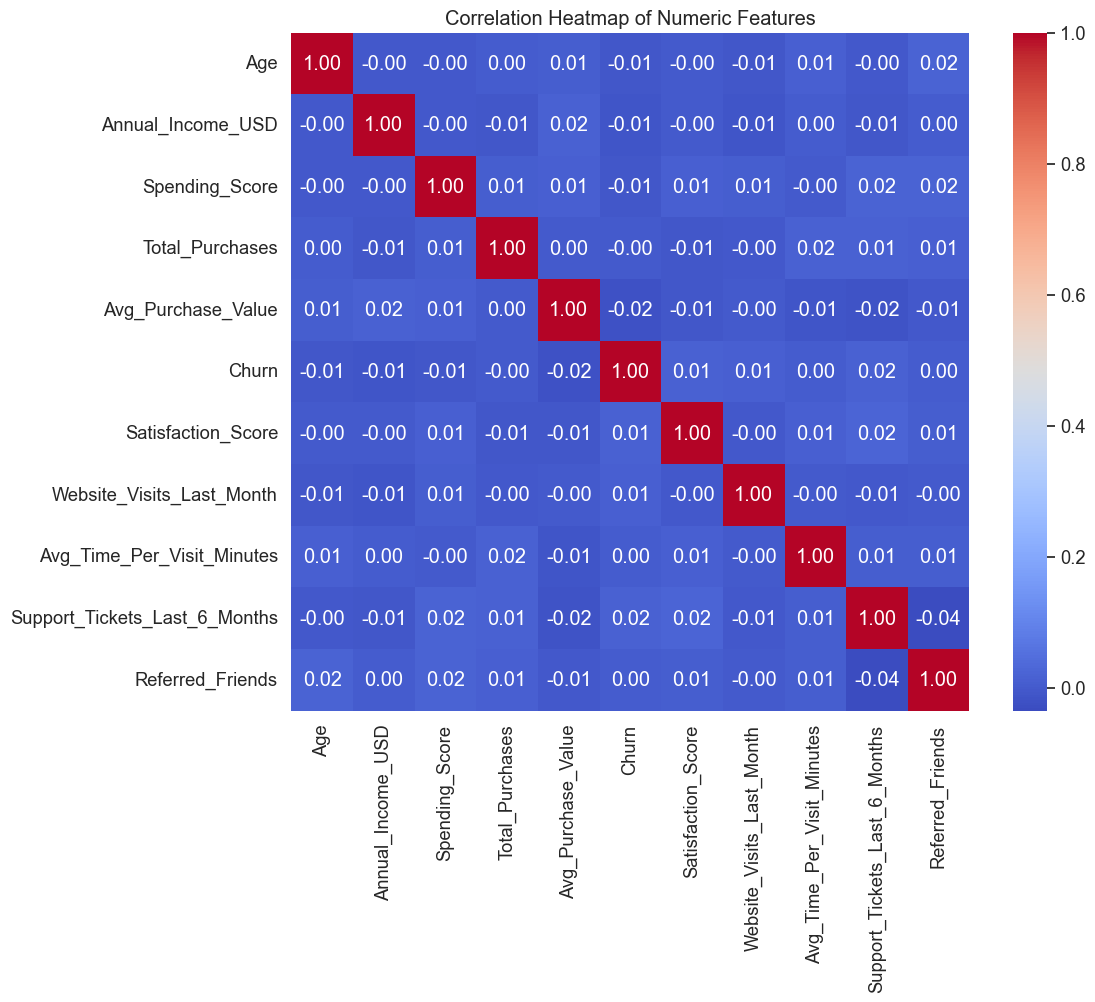

In [18]:
# Correlation heatmap for numeric features if there are at least 4 numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

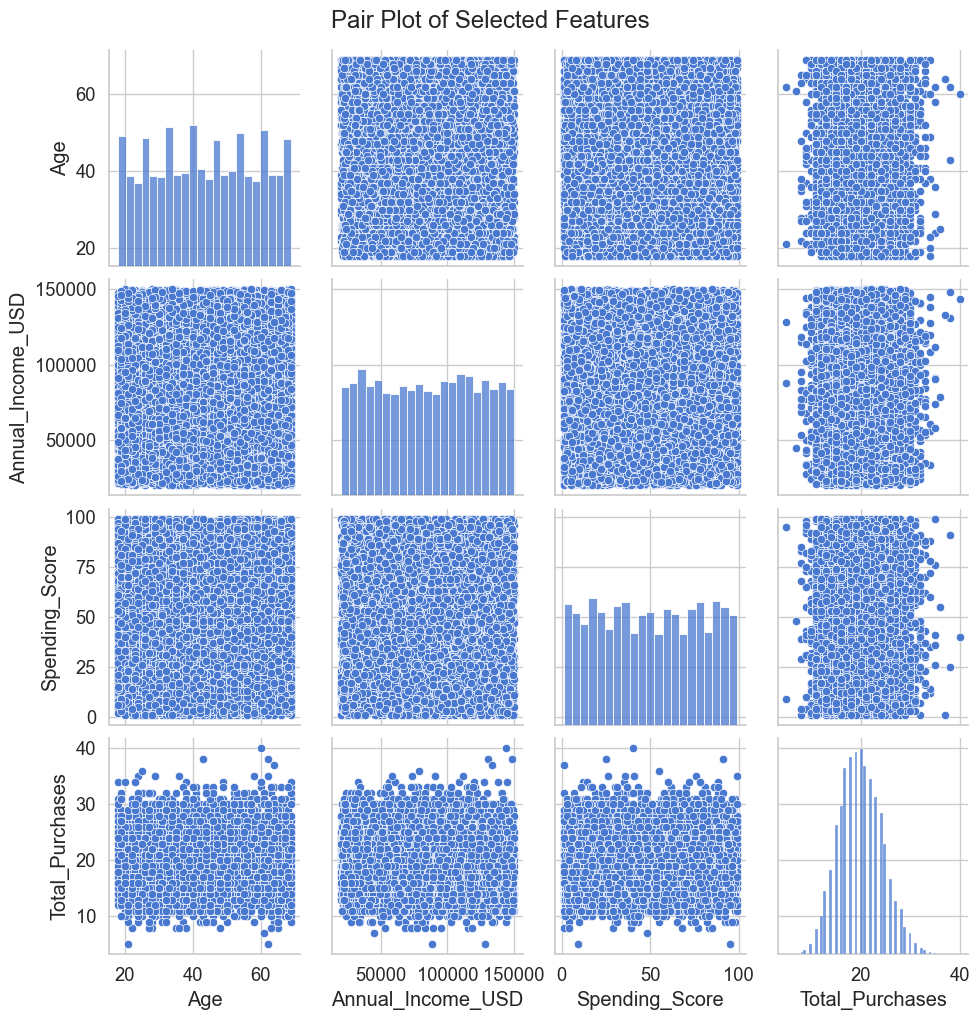

In [19]:
# Pair plot for selected variables to visually assess relationships
selected_cols = ['Age', 'Annual_Income_USD', 'Spending_Score', 'Total_Purchases']
if set(selected_cols).issubset(df.columns):
    sns.pairplot(df[selected_cols])
    plt.suptitle('Pair Plot of Selected Features', y=1.02)
    plt.show()
else:
    print('Some selected columns for pair plot are missing.')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Preparing the dataset for modeling
# Drop columns that may not contribute significantly or have high cardinality
df_model = df.copy()

# Convert categorical variables to dummy variables
categorical_columns = ['Gender', 'Membership_Status', 'Preferred_Payment_Method', 'Region']
df_model = pd.get_dummies(df_model, columns=categorical_columns, drop_first=True)

# Choose predictors and target
target = 'Churn'
features = [col for col in df_model.columns if col not in ['CustomerID', 'Last_Purchase_Date', target]]

X = df_model[features]
y = df_model[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Dataset split into training and testing sets.')

Dataset split into training and testing sets.


In [21]:
# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {accuracy:.2f}')

Random Forest Model Accuracy: 0.80


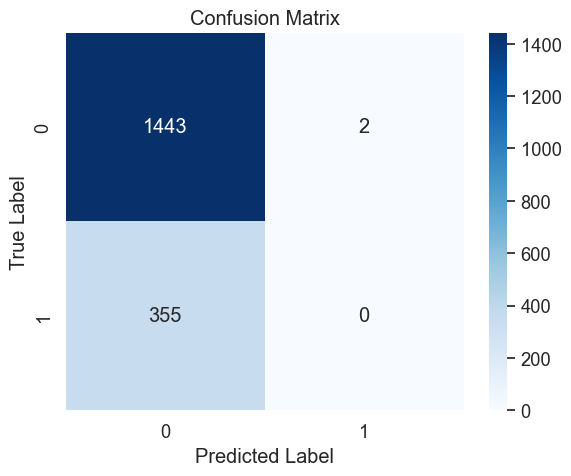

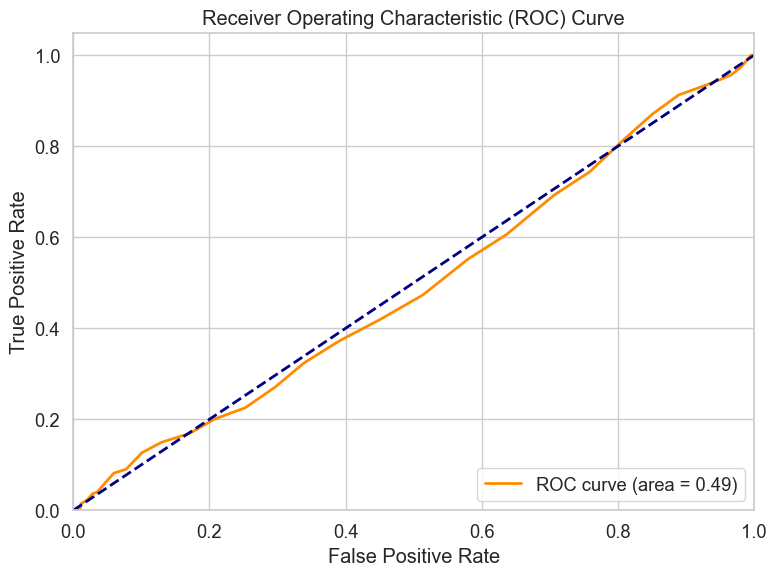

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC Curve and AUC Calculation
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

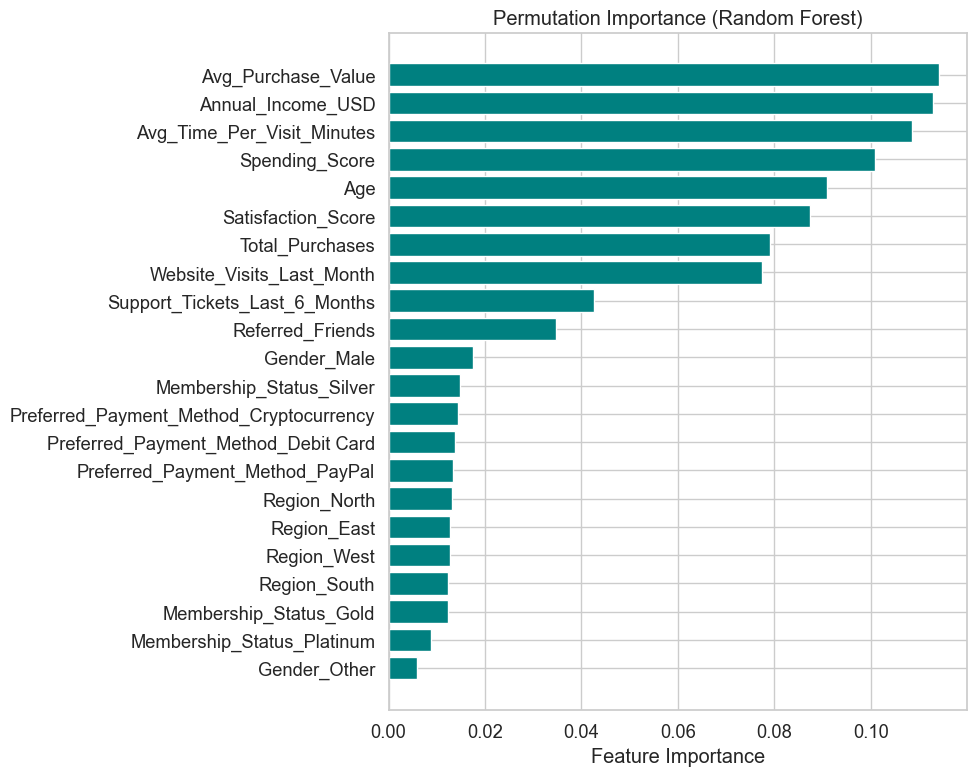

In [23]:
# Permutation Importance using feature importances from the Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Permutation Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd

# Step 1: Ask user for input values
user_input = {
    'Age': int(input("Enter Age: ")),
    'Gender': input("Enter Gender (Male/Female): "),
    'Annual_Income_USD': float(input("Enter Annual Income (USD): ")),
    'Spending_Score': int(input("Enter Spending Score (1-100): ")),
    'Membership_Status': str(input("Enter Membership Status (Bronze/Silver/Gold): ")),
    'Preferred_Payment_Method': str(input("Enter Payment Method (Credit Card/Debit Card/PayPal/Cryptocurrency): ")),
    'Region': str(input("Enter Region (North/South/East/West/Central): ")),
    'Total_Purchases': int(input("Enter Total Purchases: ")),
    'Avg_Purchase_Value': float(input("Enter Average Purchase Value: ")),
    'Satisfaction_Score': float(input("Enter Satisfaction Score (0.0–5.0): ")),
    'Website_Visits_Last_Month': int(input("Enter Website Visits Last Month: ")),
    'Avg_Time_Per_Visit_Minutes': float(input("Enter Avg Time per Visit (minutes): ")),
    'Support_Tickets_Last_6_Months': int(input("Enter Support Tickets (Last 6 Months): ")),
    'Referred_Friends': int(input("Enter Number of Referred Friends: "))
}

# Step 2: Create DataFrame from input
new_customer_df = pd.DataFrame([user_input])

# Step 3: Apply the same encoding as training set
new_customer_processed = pd.get_dummies(new_customer_df)

# Step 4: Align new data to training data columns (fill missing with 0)
new_customer_processed = new_customer_processed.reindex(columns=X_train.columns, fill_value=0)

# Step 5: Predict churn
prediction = rf_model.predict(new_customer_processed)

# Step 6: Output result
print("Prediction:", "Churn" if prediction[0] == 1 else "Not Churn")


4Enter Age:  42
Enter Gender (Male/Female):  Female
Enter Annual Income (USD):  58000
Enter Spending Score (1-100):  50
Enter Membership Status (Bronze/Silver/Gold):  Silver
Enter Payment Method (Credit Card/Debit Card/PayPal/Cryptocurrency):  PayPal
Enter Region (North/South/East/West/Central):  Central
Enter Total Purchases:  18
Enter Average Purchase Value:  120.25
Enter Satisfaction Score (0.0–5.0):  3.2
Enter Website Visits Last Month:  10
Enter Avg Time per Visit (minutes):  4.2
Enter Support Tickets (Last 6 Months):  2
Enter Number of Referred Friends:  1


Prediction: Not Churn


In [28]:
import pandas as pd

# ---- Churn Prediction on New Data ----
new_customer_dict = {
    'Age': [19],
    'Gender': ['Female'],
    'Annual_Income_USD': [34066],
    'Spending_Score': [46],
    'Membership_Status': ['Bronze'],
    'Preferred_Payment_Method': ['Credit Card'],
    'Region': ['East'],
    'Total_Purchases': [19],
    'Avg_Purchase_Value': [188.58],
    'Satisfaction_Score': [2.9],
    'Website_Visits_Last_Month': [14],
    'Avg_Time_Per_Visit_Minutes': [6.15],
    'Support_Tickets_Last_6_Months': [6],
    'Referred_Friends': [0]
}
new_customer_df = pd.DataFrame(new_customer_dict)
new_customer_encoded = pd.get_dummies(new_customer_df)
new_customer_aligned = new_customer_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict
prediction = rf_model.predict(new_customer_aligned)
proba = rf_model.predict_proba(new_customer_aligned)

# Output
print("\n Prediction:", "Churn" if prediction[0] == 1 else "Not Churn")
print(f"Not Churn Probability: {proba[0][0]:.2f}")
print(f"Churn Probability: {proba[0][1]:.2f}")


 Prediction: Not Churn
Not Churn Probability: 0.91
Churn Probability: 0.09
